# Swiggy 50 dataset
This Dataset contains Restaurants/Food Outlets in Top 50 most populous cities in India, but the list only contains 49 cities as Swiggy does not provide services in Srinagar.
- Same Restaurants can be in multiple cities as different outlets/franchise hence, unique Restaurant Name is less than actual entries in dataset.

In [402]:
import numpy as np                                                 
import pandas as pd                                                
import pandas_profiling
import matplotlib.pyplot as plt                                    
import seaborn as sns 
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
%matplotlib inline
sns.set()

from subprocess import check_output ###Assignment


In [403]:
data = pd.read_csv("swiggy_50.csv")
print(data.columns)

Index(['Restaurant Name', 'Category', 'Rating', 'Cost for two', 'Veg', 'city',
       'Area', 'Locality', 'Address', 'Long Distance Delivery'],
      dtype='object')


In [404]:
data.head()
print(set(data["city"]))

{'Chandigarh', 'Ranchi', 'Jamshedpur', 'Gwalior', 'Surat', 'Allahabad', 'Mirzapur', 'Rajkot', 'Aurangabad', 'Bhiwandi', 'Kota', 'Lucknow', 'Jabalpur', 'Chennai', 'Dhanbad', 'Varanasi', 'Indore', 'Amritsar', 'Bareilly', 'Aligarh', 'Bangalore', 'Bhopal', 'Haora', 'Cawnpore', 'Nagpur', 'Thane', 'Bhilai', 'Vadodara', 'Meerut', 'Ghaziabad', 'Chinchvad', 'Madurai', 'Agra', 'Faridabad', 'Vishakhapatnam', 'Mysore', 'Ludhiana', 'Pune', 'Ahmedabad', 'Patna', 'Bezwada', 'Raipur', 'Kolkata', 'Mumbai', 'Delhi', 'Hyderabad', 'Jaipur', 'Nasik', 'Kalyan'}


## Cleaning

### Removing address,Locality as it does not add anything to our analysis

In [405]:
print(len(data))
data.drop("Address", axis =1, inplace=True)

31804


In [406]:
data.isnull().sum()

Restaurant Name               0
Category                      0
Rating                    17666
Cost for two                  0
Veg                           0
city                          0
Area                          0
Locality                     24
Long Distance Delivery        0
dtype: int64

In [407]:
data.dropna(inplace=True)

In [408]:
len(data)

14120

In [409]:
data.drop('Area',inplace=True, axis=1)

In [410]:
data.sort_values(by = 'Cost for two', inplace= True)
# print(data)
l = data[data["Cost for two"]<20].index
data.drop(l, inplace=True)
data

,Restaurant Name,Category,Rating,Cost for two,Veg,city,Locality,Long Distance Delivery
6921,Shree Krushna Wade wale,"Fast Food,Beverages",4.1,24,True,Pune,Sinhgad Road,0
24865,Shegaon Kachori Center,"Snacks,Fast Food",4.5,28,True,Thane,Thane,0
17291,Juicecafe,Beverages,3.9,30,False,Vishakhapatnam,Dwarka Nagar,0
24847,KESHAV VADA TEA CENTER,"Snacks,Beverages",4.3,30,False,Thane,Thane Panchpakhadi,0
22209,Krushnai Uphar,"Street Food,Snacks,Fast Food",4.5,36,True,Nasik,College Road,0
...,...,...,...,...,...,...,...,...
1927,Chin Chin Chu,"Asian,Japanese,Chinese",4.3,2200,False,Mumbai,Lower Parel Worli,0
340,United Coffee House,"Indian,Asian,Continental,European,Snacks,Italian",3.7,2500,False,Delhi,E block,1
2209,Indigo Delicatessen,"European,Italian",3.8,2500,False,Mumbai,Mathuras das mill compund,1
4664,Gourmet Couch By ITC windsor,"North Indian,Asian,Mughlai,Biryani,Grill,Seafo...",4.3,2500,False,Bangalore,Malleshwaram,0


In [411]:
data.drop('Locality',inplace=True, axis=1)

In [412]:
data.reset_index(inplace=True)
data.head(10)


,index,Restaurant Name,Category,Rating,Cost for two,Veg,city,Long Distance Delivery
0,6921,Shree Krushna Wade wale,"Fast Food,Beverages",4.1,24,True,Pune,0
1,24865,Shegaon Kachori Center,"Snacks,Fast Food",4.5,28,True,Thane,0
2,17291,Juicecafe,Beverages,3.9,30,False,Vishakhapatnam,0
3,24847,KESHAV VADA TEA CENTER,"Snacks,Beverages",4.3,30,False,Thane,0
4,22209,Krushnai Uphar,"Street Food,Snacks,Fast Food",4.5,36,True,Nasik,0
5,15770,SNACK BUCKET,"Seafood,Indian,Goan,Punjabi,Fast Food,Chinese,...",3.3,39,False,Indore,0
6,16951,House Of Puffs,Snacks,3.9,40,True,Vadodara,0
7,6457,SWASTIK UDUPI VEF,"South Indian,Snacks",3.3,48,False,Hyderabad,0
8,5988,NEW SHAHI NAAN,Indian,4.6,49,False,Hyderabad,0
9,5839,TEA TIME - SERENI TEA,Beverages,3.9,50,False,Hyderabad,1


In [413]:
profile = pandas_profiling.ProfileReport(data)
profile.to_file(output_file="swiggy_data_before_preprocessing.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### classifying cities as tier1, tier 2 or tier 3

In [414]:
tier1=["Delhi","Mumbai","Pune" ,"Bengaluru","Ahmedabad","Chennai","Kolkata", "Banglore","Hyderabad" ]
tier2=pd.read_excel("cities.xlsx")["Tier 2"]

In [415]:
t2=[]
for state in tier2:
    for city in state.split(','):
        t2.append(city.strip())
tier2=t2
tier2.append('Cawnpore')

In [416]:
def func(df):
    
    if(df['city'] in tier1):
        return "Tier 1"
    
    elif(df['city'] in tier2):
        return "Tier 2"
    
    else :
        return "Tier 3"

In [417]:
data["City Tier"] = data.apply(func, axis=1)

In [418]:
food_catergory=[]
for foods in list(data["Category"]):
    for types in foods.strip().split(','):
        food_catergory.append(types)
len(food_catergory)

43738

In [419]:
food_catergory=list(set(food_catergory))
print(len(food_catergory))
print(food_catergory)

114
['Mangalorean', 'Sweets', 'Oriental', 'Bowl Company', 'Bakery', 'European', 'indian', 'Parsi', 'Andhra', 'Tex-Mex', ' Keventers & more', 'Oriya', 'Use Code 20OFF to Avail', 'South Indian', 'Paan', 'French', 'Beverages', 'Japanese', 'Konkan', 'Australian', 'Jain', 'Korean', 'Combo', 'Bengali', 'Haleem', 'Singaporean', 'Pastas', 'Juices', 'Sushi', 'Desserts', 'Arabian', 'Bangladeshi', 'Starts at Rs.79', 'Biryani', 'Ramzan Special', 'Ice Cream', 'Pan-Asian', 'Tandoor', 'African', 'Tribal', 'British', 'Offer Valid only for New Customers', 'Use Code BF75 to Avail', 'Portuguese', 'Chinese', 'North Eastern', 'Keto', 'Nepalese', 'Navratri Special', 'Waffle', 'Steakhouse', 'Snacks', 'Lebanese', 'Salads', 'Pizzas', 'Rajasthani', 'Middle Eastern', 'Use code XPRESS121 to avail.', 'Kerala', 'Tibetan', 'Thalis', 'Burmese', 'Use Coupon GUPTA50 to avail', 'Mongolian', 'Continental', 'Hyderabadi', 'Indian', 'Maharashtrian', 'Mediterranean', 'Italian-American', 'Special Discount from (Hotel Swagath)

In [420]:
removables = ['Starts at Rs.79', 'Ramzan Special','Use code XPRESS121 to avail.','Use Code 20OFF to Avail','Use Code BF75 to Avail','Offer Valid only for New Customers','Special Discount from (Hotel Swagath)','Use Coupon GUPTA50 to avail']
food_catergory = list(set(food_catergory).difference(set(removables)))

### Post Profiling

In [421]:
profile = pandas_profiling.ProfileReport(data)
profile.to_file(output_file="swiggy_data_after_preprocessing.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Questions
- What is the average cost for 2 in the different tier of cities/ Average cost for 2 in the country
- factors on which long distance delivery depends on
- Does more cost for 2 means better customer satisfaction?
- Which cities have the highest food versatility 
- Cost comparison of Restaurants serving Indian vs foreign cuisine
- Which Restaurants offer the best value to customers.


### What is the average cost for 2 in the different tier of cities/ Average cost for 2 in the country

Text(0.5, 1.0, 'Count plot for different tiers of city.')

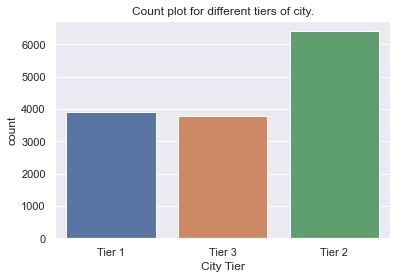

In [422]:
sns.countplot(x = 'City Tier', data=data).set_title('Count plot for different tiers of city.')

In [423]:
d = pd.DataFrame(data.groupby(['City Tier'])['Cost for two'].mean())

In [424]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

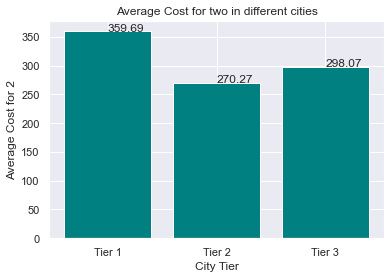

In [425]:
x,y = list(d.index),[round(i,2) for i in list(d['Cost for two'])]
plt.bar(x, y, color="teal")
    # calling the function to add value labels
addlabels(x, y)
      
    # giving title to the plot
plt.title("Average Cost for two in different cities")
      
    # giving X and Y labels
plt.xlabel("City Tier")
plt.ylabel("Average Cost for 2")
      
    # visualizing the plot
plt.show()

__Average Cost for two seems to be marginally higher in tier 1 cities than in the other 2 types__

### Let's analyze the factors on which long distance delivery depends on.

In [426]:
places = pd.DataFrame(data.groupby(['City Tier'])['Long Distance Delivery'].sum()) #Total places offering Long distance delivery Tier wise
total_places = pd.DataFrame(data.groupby(['City Tier'])['Long Distance Delivery'].count())

In [427]:
places.iloc[0,0]


2006

In [428]:
t1 = np.array([places.iloc[0,0],total_places.iloc[0,0]-places.iloc[0,0]])
t2 = np.array([places.iloc[1,0],total_places.iloc[1,0]-places.iloc[1,0]])
t3 = np.array([places.iloc[2,0],total_places.iloc[2,0]-places.iloc[2,0]])
mylabels = ["% Doing LDD", "% Not Doing LDD"]
myexplode = [0.2, 0]


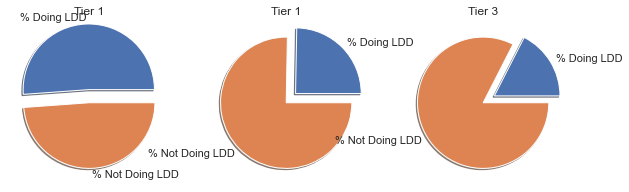

In [429]:
fig, ax = plt.subplots(1, 3,figsize=(10,10))
# plt.figure(figsize=(10,6))
ax[0].pie(t1, labels = mylabels, explode = myexplode, shadow = True)
ax[1].pie(t2, labels = mylabels, explode = myexplode, shadow = True)
ax[2].pie(t3, labels = mylabels, explode = myexplode, shadow = True)
# Add Title

ax[0].set_title('Tier 1')
ax[1].set_title('Tier 1')
ax[2].set_title('Tier 3')
plt.show()

# Display Graph


### Does cost for 2 means higher Customer Satisfaction(rating)

0.152945014757585


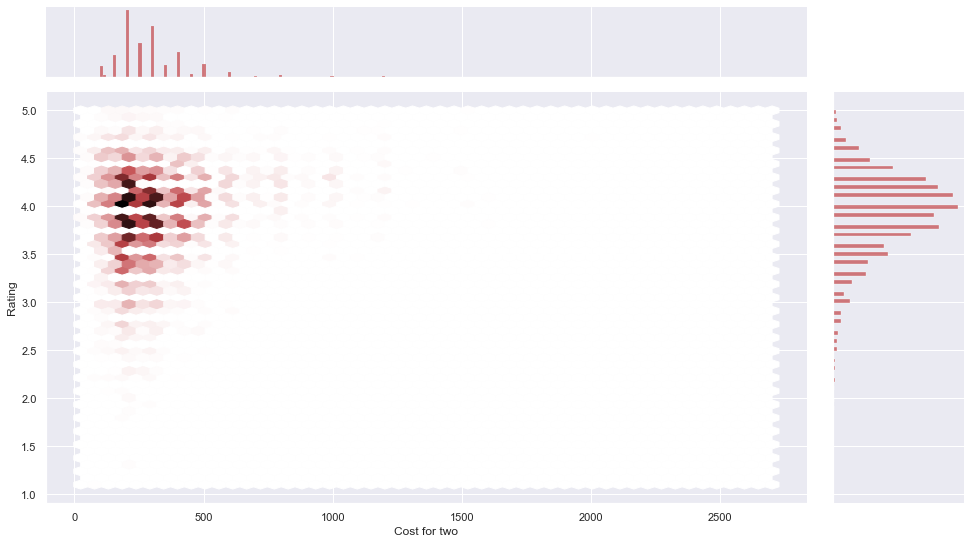

In [430]:
def corr(x,y): 
    return np.corrcoef(x,y)[0][1]

def show_corr(df,a,b):
    x,y = df[a],df[b]
    print(corr(x,y))
    sns.jointplot(x=x, y=y, kind="hex", color="r")
    plt.gcf().set_size_inches(15, 8)
show_corr(data, 'Cost for two','Rating')


__The correlation of 0.1525 indicates the rating is not heavily dependant on Cost for 2__

### Which cities have the highest food versatility?

In [431]:
dict={}
cat_count=0
cities=set(data["city"])
for city in cities:
    food_category=[]
    for foods in list(data[data["city"]==city]["Category"]):
        for types in foods.strip().split(','):
            food_category.append(types)
    food_category=list(set(food_category).difference(removables))
    dict[city]=len(food_category)
    
    

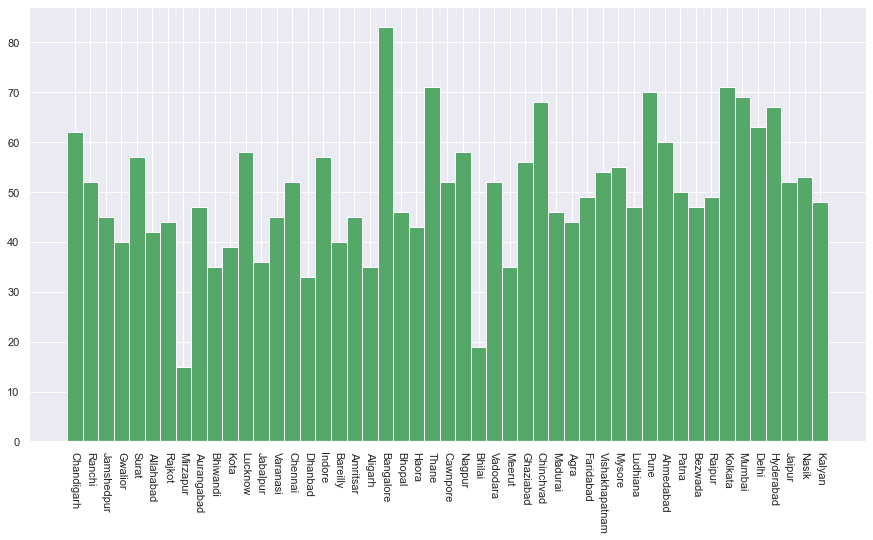

In [432]:
mylist = [key for key, val in dict.items() for _ in range(val)]

plt.bar(dict.keys(), dict.values(),width=1, color='g')
plt.xticks(rotation = 270)
plt.gcf().set_size_inches(15, 8)
plt.show()

In [433]:
df = pd.DataFrame({"City":dict.keys(),"Counts":dict.values()})
df.sort_values("Counts", ascending = False, inplace=True)
df.head(10)

,City,Counts
20,Bangalore,83
42,Kolkata,71
23,Thane,71
37,Pune,70
43,Mumbai,69
30,Chinchvad,68
45,Hyderabad,67
44,Delhi,63
0,Chandigarh,62
38,Ahmedabad,60


It can be seen that the Tier 1 cities have the highest diversity in food categories with exceptions of
__Chandigarh__, __Chinchvad__, __Kolkata__, __Thane__

In [434]:
foreign_foods= ['Salads', 'Healthy Food',
 'Mexican',
 'Australian',
 'Vietnamese',
 'Spanish',
 'Mongolian',
 'Malaysian',
 'Indonesian',
 'Burmese',
 'South American',
 'Parsi',
 'Italian',
 'Steakhouse',
 'Chinese',
 'Fast Food',
 'European',
 'Japanese',
 'Grill',
 'Bowl Company',
 'French',
 'Asian',
 'Sweets',
 'Tibetan',
 'Oriental',
 'Portuguese',
 'Nepalese',
 'Seafood',
 'British',
 'Turkish',
 'African',
 'Konkan',
 'Italian-American',
 'Greek',
 'Arabian',
 'Continental',
 'Bangladeshi',
 'Snacks',
 'Mediterranean',
 'Desserts',
 'Middle Eastern',
 'Pizzas',
 'Afghani',
 'Waffle',
 'American',
 'Juices',
 'Lebanese',
 'Bakery',
 'Thai',
 'Pastas',
 'Coastal',
 'Tex-Mex',
 'Korean',
 'Ice Cream Cakes',
 'Keventers & more',
 'Keto',
 'Singaporean',
 'Tribal',
 'Burgers',
 'Pan-Asian',
 'Ice Cream',
 'Persian',
 'Barbecue',
 'Sushi']

In [435]:
Restaurants_with_ForeignFoods=[]
cat_countF=0
rating_sumF=[]
cf2=[]
for i in range(len(data)):
    for foods in data.loc[i,"Category"].strip().split(','):
        if(foods in foreign_foods):
            Restaurants_with_ForeignFoods.append(data.loc[i,"Restaurant Name"])
            rating_sumF.append(data.loc[i,"Rating"])
            cf2.append(data.loc[i,"Cost for two"])
            
            break
            

In [436]:
Restaurants_without_ForeignFoods=[]
cat_count=0
rating_sum=[]
cf2I=[]
for i in range(len(data)):
    isVeg=1
    for foods in data.loc[i,"Category"].strip().split(','):
        if(foods in foreign_foods):
            isVeg=0
    if(isVeg):
        Restaurants_without_ForeignFoods.append(data.loc[i,"Restaurant Name"])
        rating_sum.append(data.loc[i,"Rating"])
        cf2I.append(data.loc[i,"Cost for two"])
            
            

In [437]:
trace0 = go.Box(y = rating_sumF, name = "Rating")
trace1 = go.Box(y = rating_sum, name = "Rating")
fig = make_subplots(rows=1, 
                    cols=2, 
                    print_grid= True, 
                    row_titles=['Contrast in Rating'],column_titles=["Restaurants offering foreign cuisines","Restaurants offering Indian cuisines"]
                    
                    
                   )
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.show()

This is the format of your plot grid:
[ (1,1) x,y   ]  [ (1,2) x2,y2 ]



In [438]:
trace0 = go.Box(y = cf2, name = "Cost for 2")
trace1 = go.Box(y = cf2I, name = "Cost for 2")
fig = make_subplots(rows=1, 
                    cols=2, 
                    print_grid= True, 
                    row_titles=['Contrast in Cost for two'],
                    column_titles=["Restaurants offering foreign cuisines","Restaurants offering Indian cuisines"]
                    
                    
                   )
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.show()

This is the format of your plot grid:
[ (1,1) x,y   ]  [ (1,2) x2,y2 ]



### Restaurants Offering best values to Customers

Restaurants with __highest ratings__ at __lowest cost__ are the best ones out there.


In [439]:
swiggy = data

In [442]:
swiggy['golden ratio']=swiggy['Rating']/swiggy['Cost for two']
swiggy.head()
swiggy.sort_values(by = 'golden ratio', ascending=False, inplace = True)

In [443]:
swiggy

,df_index,Restaurant Name,Category,Rating,Cost for two,Veg,city,Long Distance Delivery,City Tier,golden ratio
0,6921,Shree Krushna Wade wale,"Fast Food,Beverages",4.1,24,True,Pune,0,Tier 1,0.170833
1,24865,Shegaon Kachori Center,"Snacks,Fast Food",4.5,28,True,Thane,0,Tier 3,0.160714
3,24847,KESHAV VADA TEA CENTER,"Snacks,Beverages",4.3,30,False,Thane,0,Tier 3,0.143333
2,17291,Juicecafe,Beverages,3.9,30,False,Vishakhapatnam,0,Tier 3,0.130000
4,22209,Krushnai Uphar,"Street Food,Snacks,Fast Food",4.5,36,True,Nasik,0,Tier 3,0.125000
...,...,...,...,...,...,...,...,...,...,...
14100,2778,SK Foodiez,Combo,3.6,2000,False,Kolkata,0,Tier 1,0.001800
14110,4664,Gourmet Couch By ITC windsor,"North Indian,Asian,Mughlai,Biryani,Grill,Seafo...",4.3,2500,False,Bangalore,0,Tier 3,0.001720
14109,2209,Indigo Delicatessen,"European,Italian",3.8,2500,False,Mumbai,1,Tier 1,0.001520
14111,2951,Serafina,"Italian,Pizzas",4.1,2700,False,Kolkata,0,Tier 1,0.001519
